In [14]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import h5py
from scipy.ndimage.filters import gaussian_filter
from matplotlib import cm as CM

### Ejemplo de Mapa de densidad para el Groundtruth

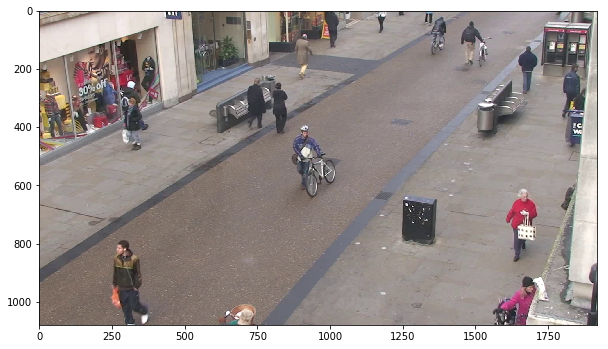

In [4]:
PATH_VIDEO = "../../birdeye/data/TownCentreXVID.avi"
capture = cv2.VideoCapture(PATH_VIDEO)
if(capture.isOpened()):
    ret, first_image = capture.read()
    if ret == False:
        raise Exception("Error al obtener captura.")
else:
    raise Exception("Error al abrir video.")

capture.release()
first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(first_image)
plt.show()

In [8]:
PATH_DATA = "../../birdeye/data/TownCentre-groundtruth.top"
data = pd.read_csv(PATH_DATA)
data.columns = ['numPersona','numFrame','headValid','bodyValid','headLeft','headTop','headRight','headBottom','bodyLeft','bodyTop','bodyRight','bodyBottom']
data.tail()

,numPersona,numFrame,headValid,bodyValid,headLeft,headTop,headRight,headBottom,bodyLeft,bodyTop,bodyRight,bodyBottom
71454,226,4500,1,1,510.788,242.550,530.953,264.507,490.273,231.738,562.261,419.373
71455,227,4500,1,1,1596.158,522.755,1625.587,554.594,1555.319,506.651,1653.329,771.720
71456,228,4500,1,1,1173.783,534.921,1203.478,567.389,1144.991,518.861,1230.505,787.830
71457,229,4500,1,1,657.255,285.702,678.682,309.279,635.779,274.009,708.906,475.278
71458,230,4500,1,1,1383.071,137.226,1400.721,156.358,1362.262,128.042,1418.662,291.685


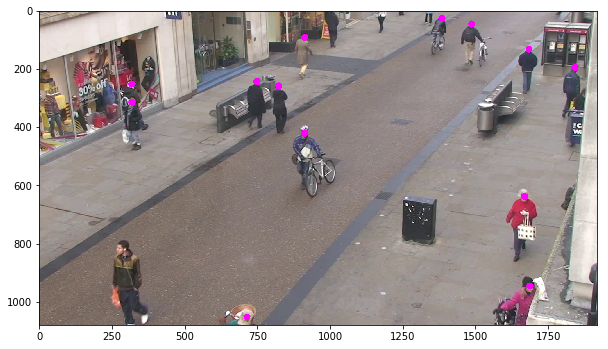

In [10]:
first_image_bbox = first_image.copy()
frame_data = data[data['numFrame']==0]

frame_points = [(row['headLeft'] + (row['headRight'] - row['headLeft'])/2, row['headTop'] + (row['headBottom'] - row['headTop'])/2 ) for index, row in frame_data.iterrows()]

for frame_point in frame_points:    
    cv2.circle(first_image_bbox, (int(frame_point[0]), int(frame_point[1])), 12, (255,0,255), -1)
    
plt.figure(figsize=(10,10))
plt.imshow(first_image_bbox)
plt.show()

In [12]:
# mapa de densidad
img = first_image
k = np.zeros((img.shape[0],img.shape[1]))
gt = np.array(frame_points)
for i in range(0,len(gt)):
    if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
        k[int(gt[i][1]),int(gt[i][0])]=1
k = gaussian_filter(k,15)
with h5py.File('ground-truth.h5', 'w') as hf:
    hf['density'] = k

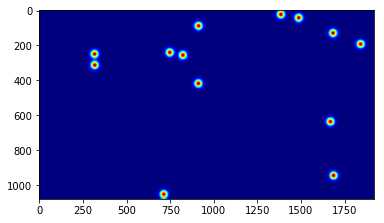

In [15]:
gt_file = h5py.File('ground-truth.h5','r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)